In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('retail_sales_dataset.csv',encoding='unicode_escape')

In [5]:
df.shape

(1000, 9)

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
pd.isnull(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [12]:
df.shape

(1000, 9)

In [13]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [15]:
df.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  24-11-2023     CUST001    Male   34           Beauty   
1                 2  27-02-2023     CUST002  Female   26         Clothing   
2                 3  13-01-2023     CUST003    Male   50      Electronics   
3                 4  21-05-2023     CUST004    Male   37         Clothing   
4                 5  06-05-2023     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  16-05-2023     CUST996    Male   62         Clothing   
996             997  17-11-2023     CUST997    Male   52           Beauty   
997             998  29-10-2023     CUST998  Female   23           Beauty   
998             999  05-12-2023     CUST999  Female   36      Electronics   
999            1000  12-04-2023    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

# Exploratory Data Analysis

## Gender

In [14]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

<Axes: xlabel='Product Category', ylabel='count'>

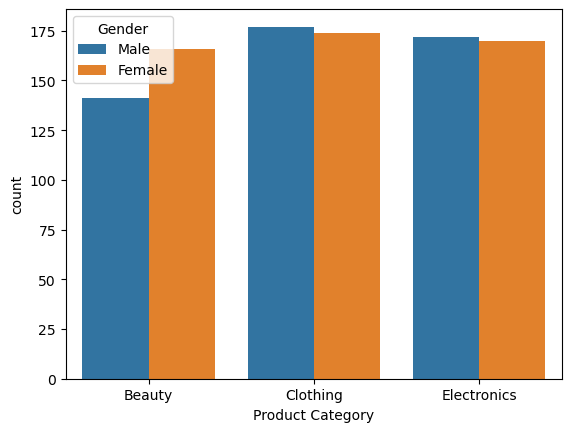

In [28]:
sns.countplot(data = df ,x='Product Category',hue='Gender')

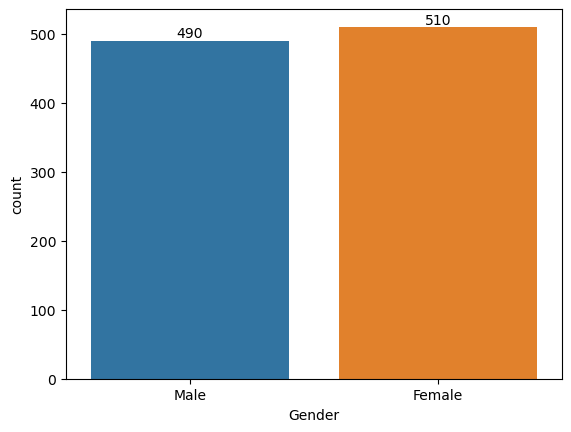

In [16]:
ax=sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
df.groupby(['Gender'],as_index=False)['Age'].sum().sort_values(by='Age',ascending=False)

,Gender,Age
0,Female,21092
1,Male,20300


<Axes: xlabel='Gender', ylabel='Age'>

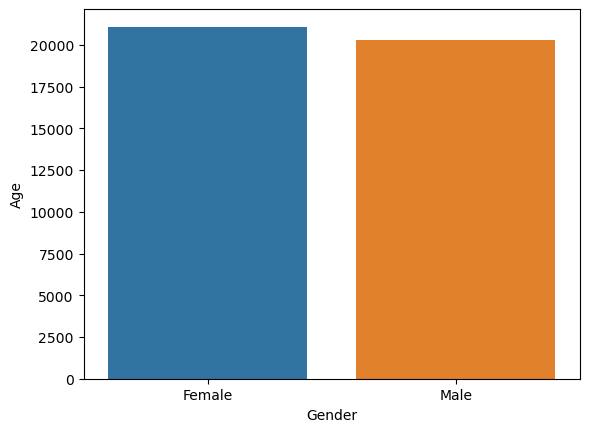

In [21]:
sales=df.groupby(['Gender'],as_index=False)['Age'].sum().sort_values(by='Age',ascending=False)
sns.barplot(x= 'Gender',y='Age',data=sales)

## Age

In [23]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Quantity'>

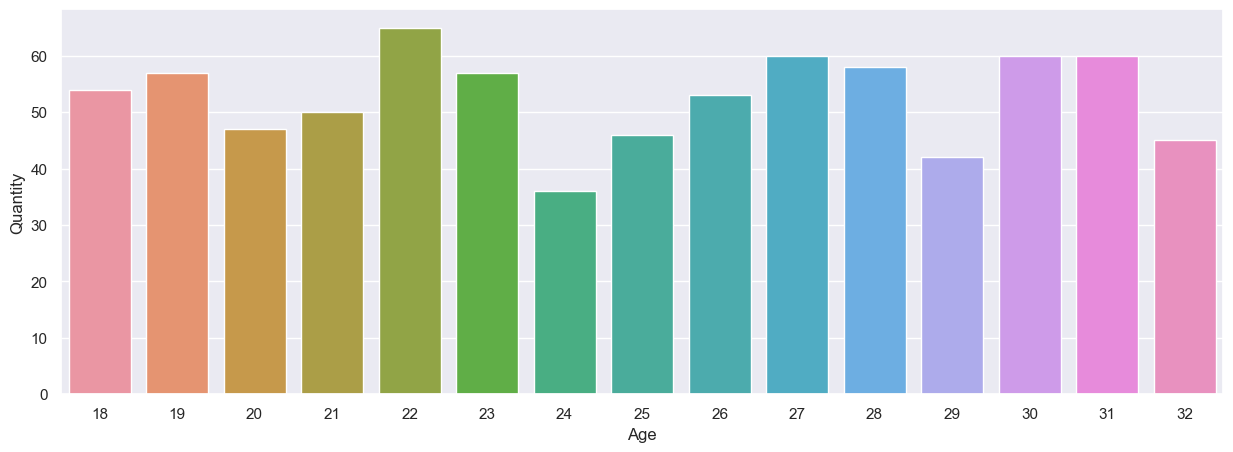

In [43]:
rsales=df.groupby(['Age'],as_index=False)['Quantity'].sum().sort_values(by='Age',ascending=True).head(15)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x= 'Age',y='Quantity',data=rsales)

<Axes: xlabel='Age', ylabel='Quantity'>

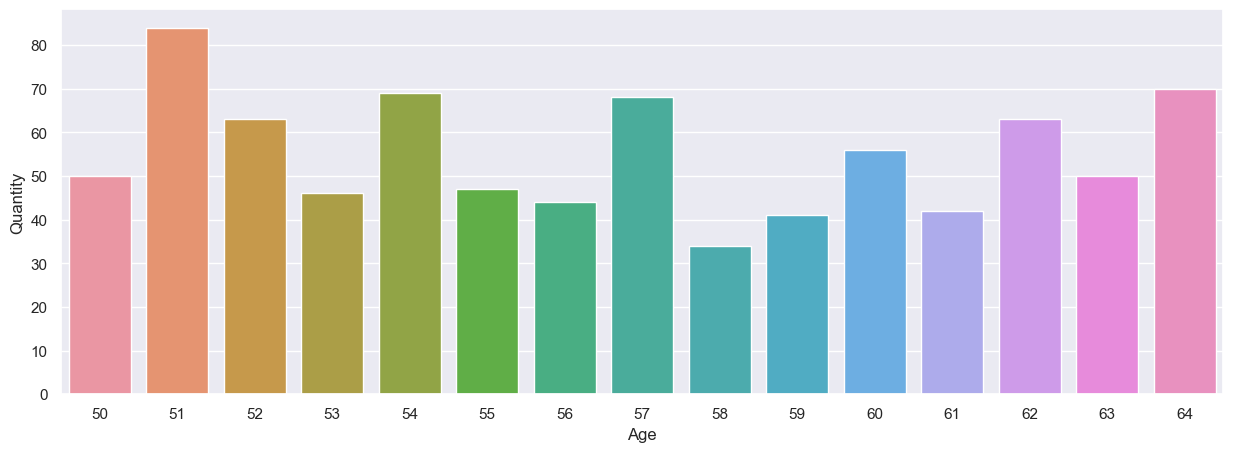

In [44]:
rsales=df.groupby(['Age'],as_index=False)['Quantity'].sum().sort_values(by='Age',ascending=False).head(15)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x= 'Age',y='Quantity',data=rsales)

## Product Category

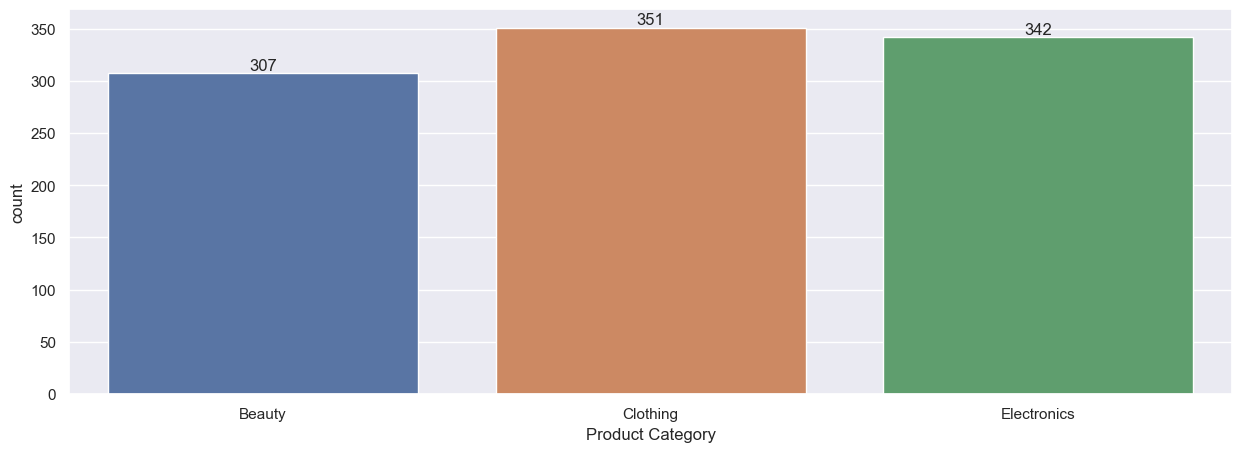

In [45]:
ax=sns.countplot(x='Product Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

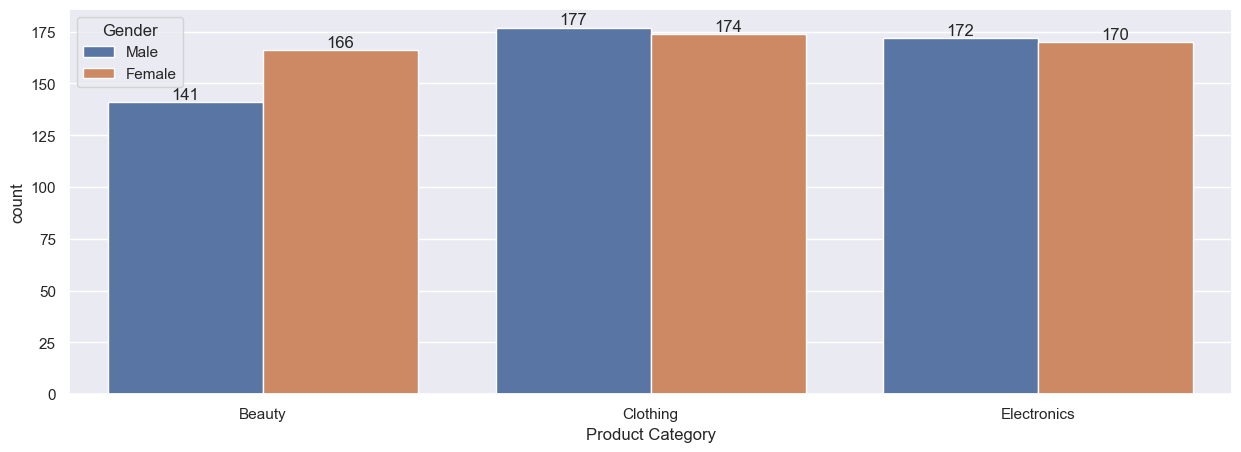

In [48]:
ax=sns.countplot(data = df ,x='Product Category',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

# Conclusion

Clothing products are more likely to buy products from the Product Category